In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
churn=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
print ("Rows     : " ,churn.shape[0])
print ("Columns  : " ,churn.shape[1])
print ("\nFeatures : \n" ,churn.columns.tolist())
print ("\nMissing values :  ", churn.isnull().sum().values.sum())
print ("\nUnique values :  \n",churn.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [8]:
churn['TotalCharges'].dtype

dtype('O')

In [9]:
churn['TotalCharges'].astype('float')

ValueError: could not convert string to float: 

In [13]:
sorted(churn['TotalCharges'].unique())[:5]

[' ', '100.2', '100.25', '100.35', '100.4']

In [14]:
churn['TotalCharges'].replace(' ',np.nan,inplace=True)

In [16]:
churn['TotalCharges'].isnull().sum()

11

In [18]:
for i in churn.columns:
    if i not in ['customerID','SeniorCitizen','tenure','MonthlyCharges']:
        print(churn[i].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

In [19]:
churn['TotalCharges'] = churn['TotalCharges'].astype('float')

In [20]:
churn['TotalCharges'].isnull().sum()

11

In [21]:
import seaborn as sns

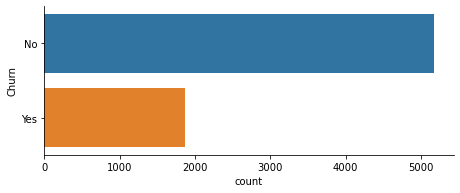

In [31]:
sns.catplot(y="Churn", kind="count", data=churn, height=2.6, aspect=2.5, orient='h')

Hence it is a imbalanced dataset.

C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


[Text(0, 0.0, '0%'),
 Text(0, 0.1, '10%'),
 Text(0, 0.2, '20%'),
 Text(0, 0.30000000000000004, '30%'),
 Text(0, 0.4, '40%'),
 Text(0, 0.5, '50%'),
 Text(0, 0.6000000000000001, '60%'),
 Text(0, 0.7000000000000001, '70%')]

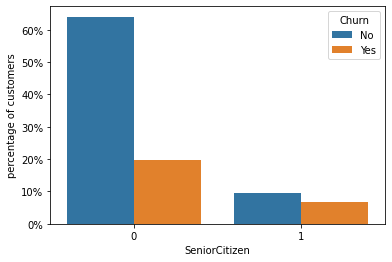

In [41]:
g = churn.groupby('SeniorCitizen')["Churn"].value_counts().to_frame()
g = g.rename({"Churn": 'percentage of customers'}, axis=1).reset_index()
g['percentage of customers'] = g['percentage of customers']/len(churn)
ax = sns.barplot(x='SeniorCitizen', y= 'percentage of customers', hue='Churn', data=g, orient='v')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])

In [37]:
g

,SeniorCitizen,Churn,percentage of customers
0,0,No,0.640068
1,0,Yes,0.197785
2,1,No,0.094562
3,1,Yes,0.067585


In [39]:
churn.groupby('SeniorCitizen')["Churn"].value_counts().to_frame()

Churn
SeniorCitizen Churn       
0             No      4508
              Yes     1393
1             No       666
              Yes      476

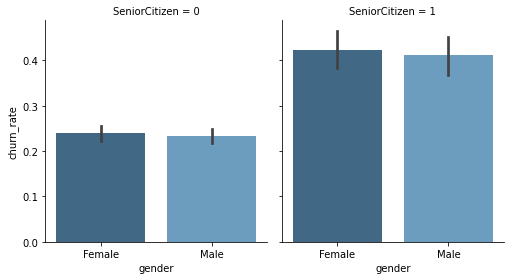

In [42]:
churn['churn_rate'] = churn['Churn'].replace("No", 0).replace("Yes", 1)
g1 = sns.FacetGrid(churn, col="SeniorCitizen", height=4, aspect=.9)
ax = g1.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])

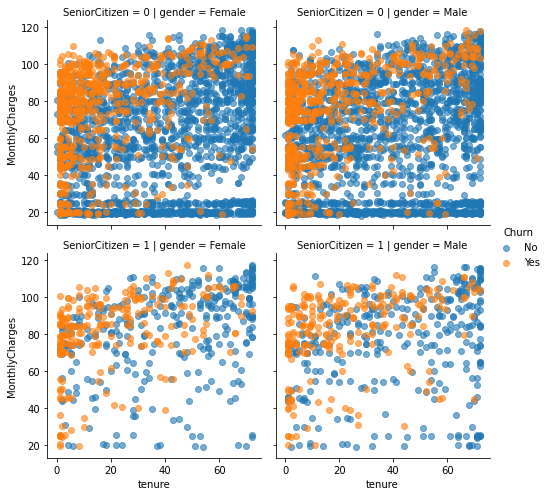

In [44]:
g = sns.FacetGrid(churn, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend()

Gender is not an indicative of churn.
SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.

In [45]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'churn_rate'],
      dtype='object')

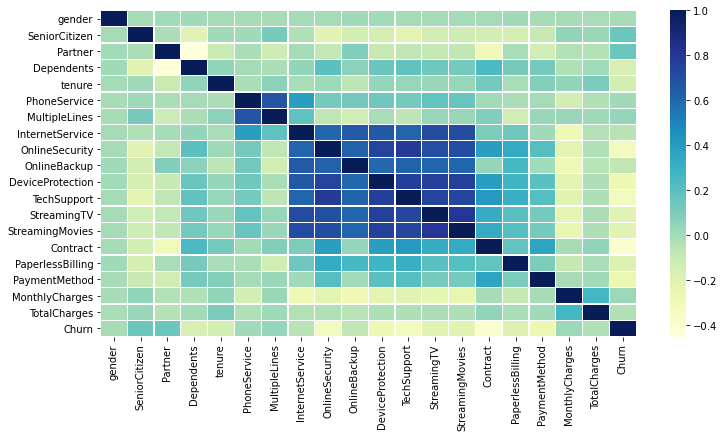

In [46]:
plt.figure(figsize=(12, 6))
df=churn.drop(['customerID', 'churn_rate'],axis=1)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

In [47]:
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,0.001808,0.010517,-0.000013,-0.006488,-0.009451,-0.000863,-0.003429,0.012230,0.005092,0.000985,0.001156,-0.000191,0.000126,0.011754,-0.005209,-0.008072,-0.012329,-0.008612
SeniorCitizen,-0.001874,1.000000,-0.016479,-0.211185,0.010834,0.008576,0.113791,-0.032310,-0.210897,-0.144828,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,-0.156530,-0.093704,0.049649,0.024043,0.150889
Partner,0.001808,-0.016479,1.000000,-0.452676,-0.101985,-0.017706,-0.117307,-0.000891,-0.081850,0.090753,-0.094451,-0.069072,-0.080127,-0.075779,-0.294806,-0.014877,-0.133115,-0.036054,-0.042334,0.150448
Dependents,0.010517,-0.211185,-0.452676,1.000000,0.048514,-0.001762,-0.019657,0.044590,0.190523,0.062775,0.156439,0.180832,0.140395,0.125820,0.243187,0.111377,0.123844,-0.029390,0.005687,-0.164221
tenure,-0.000013,0.010834,-0.101985,0.048514,1.000000,-0.018799,0.063510,-0.012008,0.017083,-0.064613,0.037174,0.033108,0.027090,0.031491,0.122446,-0.011129,0.075379,0.041647,0.107315,-0.144351
PhoneService,-0.006488,0.008576,-0.017706,-0.001762,-0.018799,1.000000,0.675070,0.387436,0.125353,0.129770,0.138755,0.123350,0.171538,0.165205,0.002247,-0.016505,-0.004070,-0.141829,-0.029676,0.011942
MultipleLines,-0.009451,0.113791,-0.117307,-0.019657,0.063510,0.675070,1.000000,0.186826,-0.066844,-0.130619,-0.013069,-0.066684,0.030195,0.028187,0.083343,-0.133255,0.025676,0.024338,0.015448,0.036310
InternetService,-0.000863,-0.032310,-0.000891,0.044590,-0.012008,0.387436,0.186826,1.000000,0.607788,0.650962,0.662957,0.609795,0.712890,0.709020,0.099721,0.138625,0.008124,-0.289963,-0.038341,-0.047291
OnlineSecurity,-0.003429,-0.210897,-0.081850,0.190523,0.017083,0.125353,-0.066844,0.607788,1.000000,0.621739,0.749040,0.791225,0.701976,0.704984,0.389978,0.334003,0.213800,-0.220566,-0.027140,-0.332819
OnlineBackup,0.012230,-0.144828,0.090753,0.062775,-0.064613,0.129770,-0.130619,0.650962,0.621739,1.000000,0.601503,0.617003,0.604117,0.606863,0.035407,0.260715,0.003183,-0.284344,-0.054672,-0.074205


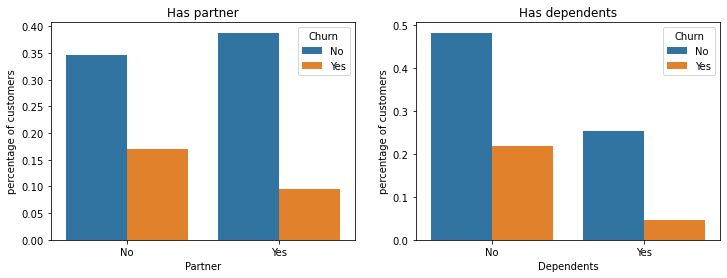

In [48]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = churn.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = churn.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

Customers that doesn't have partners are more likely to churn

Customers without dependents are also more likely to churn

C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


[Text(0, 0.0, '0%'),
 Text(0, 0.05, '5%'),
 Text(0, 0.1, '10%'),
 Text(0, 0.15000000000000002, '15%'),
 Text(0, 0.2, '20%'),
 Text(0, 0.25, '25%'),
 Text(0, 0.30000000000000004, '30%'),
 Text(0, 0.35000000000000003, '35%'),
 Text(0, 0.4, '40%')]

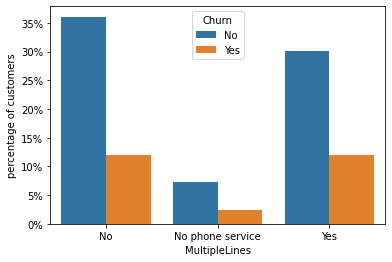

In [52]:
g = churn.groupby('MultipleLines')["Churn"].value_counts().to_frame()
g = g.rename({"Churn": 'percentage of customers'}, axis=1).reset_index()
g['percentage of customers'] = g['percentage of customers']/len(churn)
ax = sns.barplot(x='MultipleLines', y= 'percentage of customers', hue='Churn', data=g, orient='v')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])

Few customers doesn't have phone service

Customers with multiple lines have a slightly higher churn rate

C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


[Text(0, 0.0, '0%'),
 Text(0, 0.05, '5%'),
 Text(0, 0.1, '10%'),
 Text(0, 0.15000000000000002, '15%'),
 Text(0, 0.2, '20%'),
 Text(0, 0.25, '25%'),
 Text(0, 0.30000000000000004, '30%')]

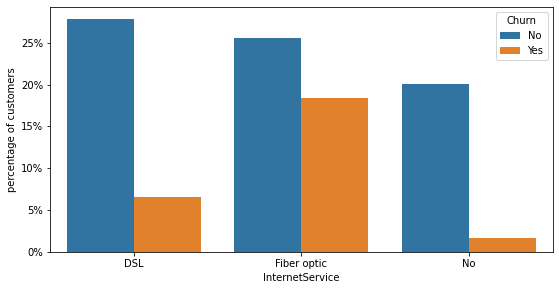

In [54]:
plt.figure(figsize=(9, 4.5))
g = churn.groupby('InternetService')["Churn"].value_counts().to_frame()
g = g.rename({"Churn": 'percentage of customers'}, axis=1).reset_index()
g['percentage of customers'] = g['percentage of customers']/len(churn)
ax = sns.barplot(x='InternetService', y= 'percentage of customers', hue='Churn', data=g, orient='v"')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])

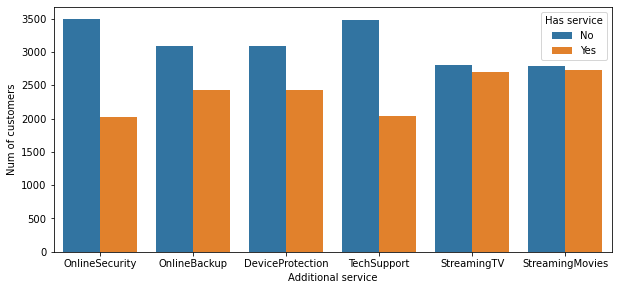

In [55]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

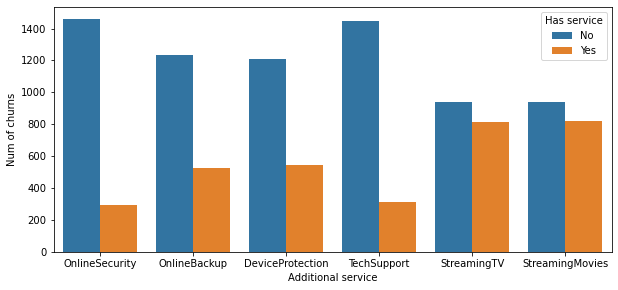

In [56]:
plt.figure(figsize=(10, 4.5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

Customers with the first 4 additionals (security to tech support) are more unlikely to churn

Streaming service is not predictive for churn

C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


[Text(0, 0.0, '0%'),
 Text(0, 0.025, '2%'),
 Text(0, 0.05, '5%'),
 Text(0, 0.07500000000000001, '8%'),
 Text(0, 0.1, '10%'),
 Text(0, 0.125, '12%'),
 Text(0, 0.15000000000000002, '15%'),
 Text(0, 0.17500000000000002, '18%'),
 Text(0, 0.2, '20%')]

<Figure size 648x324 with 0 Axes>

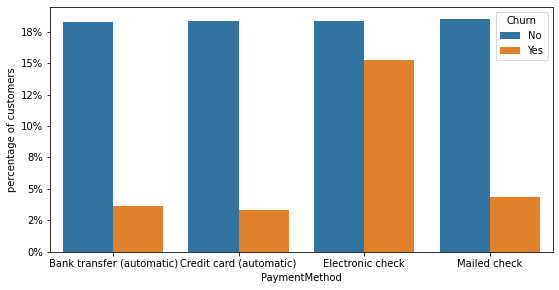

In [57]:
plt.figure(figsize=(9, 4.5))
plt.figure(figsize=(9, 4.5))
g = churn.groupby('PaymentMethod')["Churn"].value_counts().to_frame()
g = g.rename({"Churn": 'percentage of customers'}, axis=1).reset_index()
g['percentage of customers'] = g['percentage of customers']/len(churn)
ax = sns.barplot(x='PaymentMethod', y= 'percentage of customers', hue='Churn', data=g, orient='v"')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])

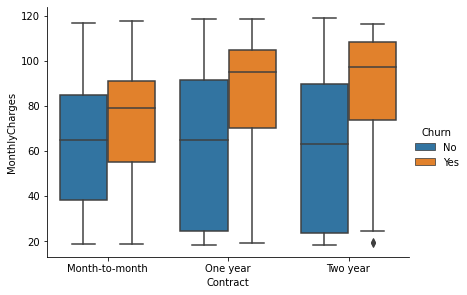

In [58]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=churn, height=4.2, aspect=1.4)

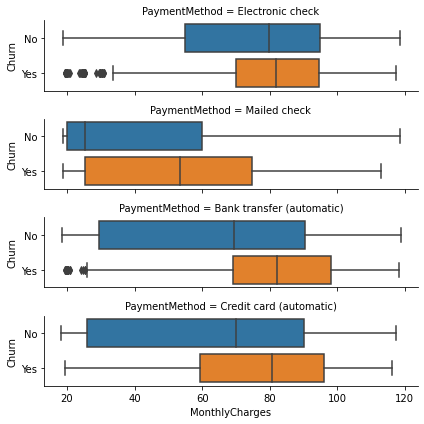

In [63]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=churn, height=1.5, aspect=4)

Longer contracts are more affected by higher monthly charges (for churn rate).

Mailed checks have lower charges

There is a huge gap in charges between customers that churn and those that don't with respect to Mailed Check